<a href="https://colab.research.google.com/github/jquelas/seattle_pricing_model/blob/main/seattle_pricing_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Housing Data Analysis for Real Estate Value Prediction**

## **Introduction**  

This report aims to analyze a dataset of residential properties obtained from [Kaggle](https://www.kaggle.com/datasets/shree1992/housedata). The dataset contains detailed information on housing characteristics, such as sale prices and property attributes (location, size, and age). The data correspond to the sale of 4,600 properties in the Seattle area and its surroundings between June and September 2014.  

Initially, this analysis serves as a tool to identify patterns in the real estate market, predict housing prices, and provide valuable insights for buyers, sellers, and real estate developers.  

## **Objective**  

The main objective of this analysis is to understand the factors that influence housing prices and develop a predictive model to estimate the price of a property based on its characteristics.  

## **Scope**  

This document aims to:  

- Examine the relationship between dataset variables and property prices.  
- Identify trends and anomalies in the real estate market.  
- Provide recommendations based on findings to support strategic decision-making.  

The analysis is limited to the data provided in the dataset and does not include additional contextual data or price updates beyond the original data collection date.  

## **Dataset Description**  

The dataset consists of relevant information on residential properties. The table below details its fields and their meanings:  

| Field                | Description                                                                                 |
|----------------------|---------------------------------------------------------------------------------------------|
| `date`              | Date when the property sale was recorded.                                                   |
| `price`             | Sale price of the property (in dollars).                                                    |
| `bedrooms`          | Number of bedrooms in the property.                                                         |
| `bathrooms`         | Number of bathrooms in the property (including full and partial bathrooms).                  |
| `sqft_living`       | Living area of the property in square feet.                                                 |
| `sqft_lot`          | Lot size of the property in square feet.                                                    |
| `floors`            | Number of floors in the property.                                                           |
| `waterfront`        | Indicates whether the property has a waterfront view (1: Yes, 0: No).                       |
| `view`              | Index measuring the quality of the property's view (0 to 4).                               |
| `condition`         | General condition of the property (1: Very Poor, 5: Excellent).                            |
| `sqft_above`        | Living area above ground level in square feet.                                             |
| `sqft_basement`     | Basement area in square feet.                                                              |
| `yr_built`          | Year the property was built.                                                               |
| `yr_renovated`      | Year the property was renovated (0 if never renovated).                                    |
| `street`            | Name of the street where the property is located.                                          |
| `city`              | City where the property is located.                                                        |
| `statezip`          | Zip code and state where the property is located.                                          |
| `country`           | Country where the property is located.                                                     |

The dataset provides a broad and detailed perspective on the physical and contextual characteristics of the properties, allowing for an in-depth analysis to achieve the proposed objective.  

## **Dataset Exploration**  

### **Data Loading**  

The first step will be to import the data from Kaggle. The data will be cached, and the path leading to them will be stored in the **path** variable.

In [2]:
import kagglehub

# Se descarga la última versión desde kaggle
path = kagglehub.dataset_download("shree1992/housedata")

# Se imprime el path para utilizarlo al momento de cargar los datos
print("Path to dataset files:", path)

d:\seattle_pricing_model\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\George\.cache\kagglehub\datasets\shree1992\housedata\versions\2


The next step will be to create a function using the **os** and **pandas** libraries to load the dataset in *CSV* format.

In [3]:
import pandas as pd
import os

# Se crea una función para guardar los datos del dataset en un objeto
# de tipo dataframe
def load_housing_data(housing_path=path):
    csv_path = os.path.join(housing_path, "data.csv")
    return pd.read_csv(csv_path)

With the **load_housing_data** function, the data is loaded from the dataset, creating a *dataframe* object called **housing**. Subsequently, the first rows will be printed along with the dataset attributes using the **head()** method. This will allow verification of the data structure that will be used for analysis.

In [4]:
# Se carga el modelo y es guardado como un objeto dataframe
housing = load_housing_data()

# Se muestran las primeras 5 lineas de dicho objeto
housing.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


Among the options offered by the **pandas** library, there is the possibility of obtaining information about the *dataframe* object that has just been created using the **info()** method.

In [5]:
# Se muestra la información del objeto
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

The **info()** method allows us to determine that the dataset contains 4,600 entries and 18 attributes, of which 4 are of type *float64*, 9 are of type *int64*, and 5 are of type *object*. None of the attributes contain null values.  

### **Dataset Analysis**  

The next step will be to use the **describe()** method to obtain statistical information for each numerical attribute. Attributes of type *object* are not taken into account.

In [6]:
# El siguiente paso es mostrar la descripción de estadística de
# los atributos numéricos
housing.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


A first consideration to keep in mind is that the minimum values for property price, bedrooms, and bathrooms are zero. Let's start by examining how many properties have a price of zero and what values their other attributes have, as it is possible that those with a price of zero also have zero bedrooms.

In [7]:
# Se cuentan la cantidad de viviendas cuyo precio es igual a cero
zero_price = housing[housing["price"] == 0].shape[0]

# Se imprime la cantidad de viviendas cuyo precio es igual a cero
print(f"Viviendas con precio igual a 0: {zero_price}")

Viviendas con precio igual a 0: 49


In [8]:
# Además, se guardan la cantidad de viviendas del dataset que poseen precio
# igual a cero
zero_price_houses = housing[housing["price"] == 0]

# Posteriormente se imprimen para examinar los demás atributos
display(zero_price_houses)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4354,2014-05-05 00:00:00,0.0,3.0,1.75,1490,10125,1.0,0,0,4,1490,0,1962,0,3911 S 328th St,Federal Way,WA 98001,USA
4356,2014-05-05 00:00:00,0.0,4.0,2.75,2600,5390,1.0,0,0,4,1300,1300,1960,2001,2120 31st Ave W,Seattle,WA 98199,USA
4357,2014-05-05 00:00:00,0.0,6.0,2.75,3200,9200,1.0,0,2,4,1600,1600,1953,1983,12271 Marine View Dr SW,Burien,WA 98146,USA
4358,2014-05-06 00:00:00,0.0,5.0,3.50,3480,36615,2.0,0,0,4,2490,990,1983,0,21809 SE 38th Pl,Issaquah,WA 98075,USA
4361,2014-05-07 00:00:00,0.0,5.0,1.50,1500,7112,1.0,0,0,5,760,740,1920,0,14901-14999 12th Ave SW,Burien,WA 98166,USA
4362,2014-05-07 00:00:00,0.0,4.0,4.00,3680,18804,2.0,0,0,3,3680,0,1990,2009,1223-1237 244th Ave NE,Sammamish,WA 98074,USA
4374,2014-05-09 00:00:00,0.0,2.0,2.50,2200,188200,1.0,0,3,3,2200,0,2007,0,39612 254th Ave SE,Enumclaw,WA 98022,USA
4376,2014-05-09 00:00:00,0.0,4.0,2.25,2170,10500,1.0,0,2,4,1270,900,1960,2001,216 SW 183rd St,Normandy Park,WA 98166,USA
4382,2014-05-12 00:00:00,0.0,5.0,4.50,4630,6324,2.0,0,0,3,3210,1420,2006,0,6925 Oakmont Ave SE,Snoqualmie,WA 98065,USA
4383,2014-05-13 00:00:00,0.0,5.0,4.00,4430,9000,2.0,0,0,3,4430,0,2013,1923,9235 NE 5th St,Bellevue,WA 98004,USA


It is observed that out of the 49 properties, none have other attributes equal to zero, such as the number of bedrooms or bathrooms. We will do the same analysis for these last two attributes to verify the data of properties with zero bedrooms or bathrooms.

In [9]:
# Se cuentan la cantidad de viviendas cuya cantidad de habitaciones o baños es
# igual a cero
zero_bedrooms = housing[housing["bedrooms"] == 0].shape[0]
zero_bathrooms = housing[housing["bathrooms"] == 0].shape[0]

# Se imprime la cantidad de viviendas cuya cantidad de habitaciones o baños es
# igual a cero
print(f"Viviendas con cantidad de habitaciones igual a 0: {zero_bedrooms}")
print(f"Viviendas con cantidad de baños igual a 0: {zero_bathrooms}")

Viviendas con cantidad de habitaciones igual a 0: 2
Viviendas con cantidad de baños igual a 0: 2


In [10]:
# Además, se guardan la cantidad de viviendas del dataset que poseen
# cero habitaciones
zero_bedrooms_houses = housing[housing["bedrooms"] == 0]

# Posteriormente se imprimen para examinar los demás atributos
display(zero_bedrooms_houses)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
2365,2014-06-12 00:00:00,1095000.0,0.0,0.0,3064,4764,3.5,0,2,3,3064,0,1990,2009,814 E Howe St,Seattle,WA 98102,USA
3209,2014-06-24 00:00:00,1295648.0,0.0,0.0,4810,28008,2.0,0,0,3,4810,0,1990,2009,20418 NE 64th Pl,Redmond,WA 98053,USA


We can see that the number of properties with both zero bedrooms and zero bathrooms is 2. When printing these entries from the dataset, it is evident that they correspond to the same properties.  

Continuing with the dataset analysis, after obtaining the mean, standard deviation, minimum, maximum, and quartiles for each attribute, the next step is to visualize the distribution of each attribute using the **hist()** method. The plots will then be displayed using the **matplotlib** library.

Matplotlib is building the font cache; this may take a moment.


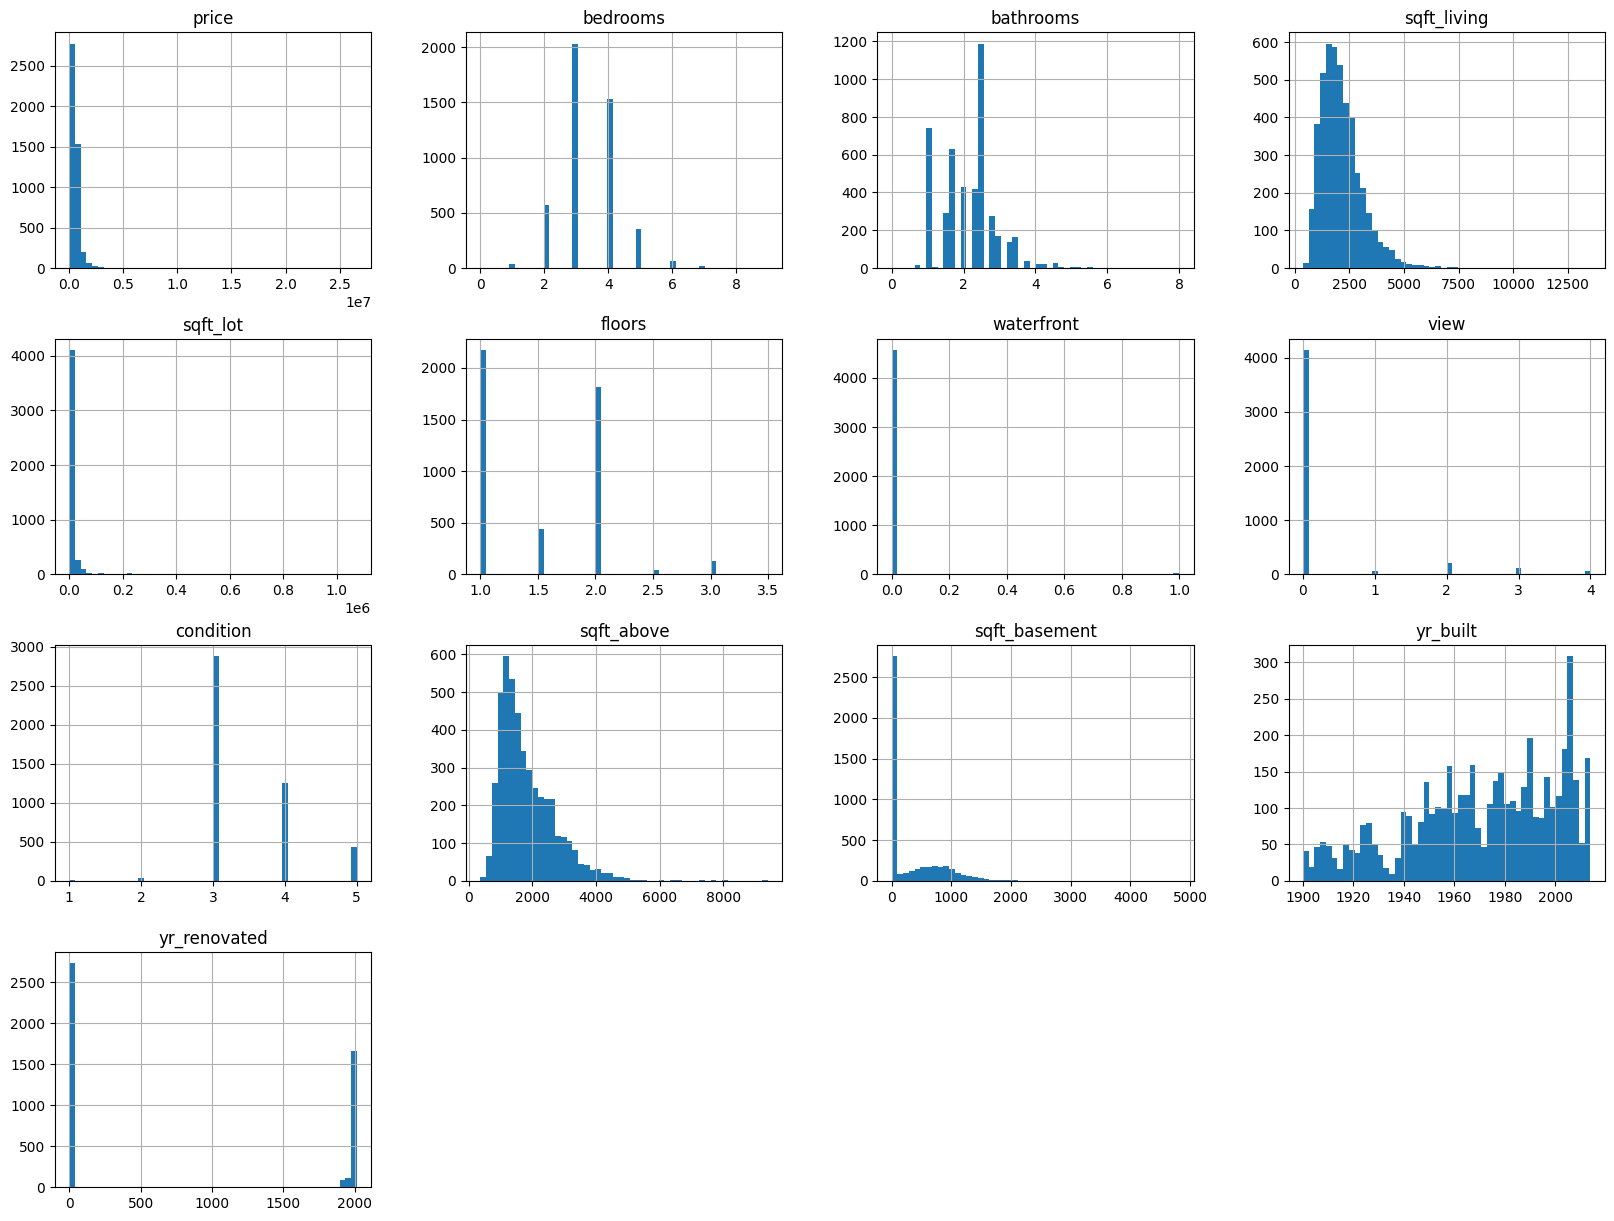

In [11]:
import matplotlib.pyplot as plt

# Se grafican los histogramas de las variables numéricas (int64 y float64)
housing.hist(bins=50, figsize=(20,15))
plt.show()

Based on the extracted data, it can be concluded that most attributes follow a normal distribution. However, some exhibit a more complex distribution, partly due to the nature of these attributes:  

- The *waterfront* attribute only contains values of zero, as there are no properties with waterfront views, making it an uninformative attribute.  
- The *view* attribute does not follow a Gaussian distribution, as most properties have a low view quality.  
- Regarding the *sqft_basement* attribute, most properties do not have a basement, so their value is zero. For those that do have a basement, the distribution appears normal.  
- The *yr_built* attribute does not follow a normal distribution but instead has a characteristic pattern showing a trend: the number of houses sold increases as the properties become newer.  
- Finally, the *yr_renovated* attribute does not follow a normal distribution either. Most properties have never been renovated and have a value of zero. Additionally, the distribution of the renovated properties does not conform to a normal distribution.  

### **Dataset Modification**  

Regarding attributes of type *object*, some will need to be converted, while others will be removed. Initially, a function will be created to take the *street*, *city*, *statezip*, and *country* attributes and generate latitude and longitude coordinates for each property. For this purpose, two methods from the **geopy** library will be used.  

Since processing with **geopy** can take up to an hour and a half, the generated CSV file will be saved separately, allowing it to be used without reprocessing the entire dataset. The original attributes will be replaced with a new one named *full_address*. Additionally, the *date* attribute will be removed, and the new attributes *latitude* and *longitude* will be added.  

***DO NOT EXECUTE THE FOLLOWING STEP AND PROCEED TO THE NEXT ONE.***

In [ ]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from google.colab import drive

# Función para obtener latitud y longitud
def get_coordinates(address):
    try:
        geolocator = Nominatim(user_agent="geoapi")
        location = geolocator.geocode(address, timeout=10)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except GeocoderTimedOut:
        return None, None

# Se crea una copia del dataset original para aplicar las transformaciones.
housing_ds = housing

# Se agrega un nuevo atributo llamado full_address que combina street, city,
# statezip y country
housing_ds["full_address"] = ( housing_ds["street"] + ", "
                              + housing_ds["city"] + ", "
                              + housing_ds["statezip"] + ", "
                              + housing_ds["country"])

# Se eliminan los atributos que no son necesarios para el análsis
housing_ds=housing_ds.drop(columns=['date', 'street', 'city',
                                    'statezip', 'country'])

# Se agregan dos atributos más, que son latitude y longitude,
# generados en base a full_address
housing_ds[["latitude", "longitude"]] = housing_ds["full_address"].apply(
    lambda x: pd.Series(get_coordinates(x)))

# Se verifica el nuevo dataset
housing_ds.head()

# Se monta el disco de google drive
drive.mount('/content/drive')

# Se guarda el dataframe modificado como un archivo CSV sin incluir
# el índice agregado por pandas
general_folder='/content/drive/MyDrive/Colab Notebooks'
data_folder = '/Proyecto Final Data Science Fundamentals/new_dataset.csv'
data_path = general_folder + data_folder
housing_ds.to_csv(data_path,index=False)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,full_address,latitude,longitude
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,"18810 Densmore Ave N, Shoreline, WA 98133, USA",47.765766,-122.338883
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,"709 W Blaine St, Seattle, WA 98119, USA",47.634542,-122.366908
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,"26206-26214 143rd Ave SE, Kent, WA 98042, USA",NaN,NaN
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,"857 170th Pl NE, Bellevue, WA 98008, USA",47.618768,-122.113802
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,"9105 170th Ave NE, Redmond, WA 98052, USA",47.683043,-122.113957


## **Data Analysis**  

Now that a new dataset has been generated and saved as a CSV file, it will be uploaded and verified to continue with the data analysis. For this purpose, the previously mentioned tools will be used.

In [ ]:
# Ruta del archivo CSV
general_folder='/content/drive/MyDrive/Colab Notebooks'
data_folder = '/Proyecto Final Data Science Fundamentals/new_dataset.csv'
data_path = general_folder + data_folder

# Cargar el archivo como DataFrame
housing_new = pd.read_csv(data_path)

# Verificar el contenido del DataFrame
housing_new.info()
housing_new.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  full_address   4600 non-null   object 
 14  latitude       4052 non-null   float64
 15  longitude      4052 non-null   float64
dtypes: float64(6), int64(9), object(1)
memory usage: 575.1+ KB


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,latitude,longitude
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4052.000000,4052.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,47.568468,-122.227225
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536,0.132241,0.131017
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,47.159373,-122.504820
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,47.488761,-122.335086
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,47.584882,-122.252230
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,47.677890,-122.146795
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000,47.777326,-121.358830


Since the goal is to conduct a data analysis to design a predictive housing price model, records with a price of zero present challenges for this analysis. These entries will be removed by creating a new dataset.  

Additionally, as observed in the price histogram, the dataset includes housing prices ranging from USD 7,800 to USD 26 million, with an average of USD 551,963. These extreme values can impact the overall analysis and will need to be filtered.  

Other records that will be removed include properties with both *bedrooms* and *bathrooms* equal to zero, as these properties should not be considered when analyzing data correlations.  

Finally, the *full_address* attribute will be removed, as it is not a *string*, and correlations can only be performed between numerical variables.  

As a result, a new dataset named **housing_filtered** will be created, incorporating all these modifications.

In [ ]:
# Define los umbrales de precio
lower_price_threshold = 100000
upper_price_threshold = 1000000

# Filtra los datos para incluir solo propiedades por encima del umbral
housing_filtered = housing_new[housing_new["price"] >= lower_price_threshold]

#Filtra los datos para incluir solo las propiedades por debajo del umbral
housing_filtered = housing_filtered[housing_filtered["price"]
                                    <= upper_price_threshold]

# Filtra el dataset para mantener solo filas donde bedrooms y
# bathrooms no sean 0
housing_filtered = housing_filtered[(housing_filtered['bedrooms'] != 0)
& (housing_filtered['bathrooms'] != 0)]

# Se remueven los atributos de tipo objeto y se crea un nuevo dataset
housing_filtered = housing_filtered.drop(columns=['full_address'])

# Se verifican los cambios en el nuevo dataset
housing_filtered.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,latitude,longitude
count,4202.000000,4202.000000,4202.000000,4202.000000,4.202000e+03,4202.000000,4202.000000,4202.000000,4202.000000,4202.000000,4202.000000,4202.000000,4202.000000,3702.000000,3702.000000
mean,474370.929346,3.341980,2.076928,2000.480723,1.427759e+04,1.489529,0.003570,0.161114,3.442170,1721.338648,279.142075,1970.773203,814.946930,47.565136,-122.226448
std,197321.784972,0.876248,0.699950,774.415711,3.568089e+04,0.537133,0.059648,0.618667,0.666191,731.402119,416.811728,29.442155,980.621552,0.135766,0.133177
min,100000.000000,1.000000,0.750000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,47.159373,-122.504820
25%,317000.000000,3.000000,1.750000,1420.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1170.000000,0.000000,1951.000000,0.000000,47.481995,-122.337027
50%,444922.500000,3.000000,2.250000,1900.000000,7.527000e+03,1.500000,0.000000,0.000000,3.000000,1520.000000,0.000000,1975.000000,0.000000,47.577232,-122.259640
75%,600000.000000,4.000000,2.500000,2470.000000,1.050000e+04,2.000000,0.000000,0.000000,4.000000,2150.000000,550.000000,1996.000000,1999.000000,47.680479,-122.143987
max,1000000.000000,9.000000,5.750000,5960.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,5190.000000,2300.000000,2014.000000,2014.000000,47.777326,-121.358830


Considering the thresholds, we will determine how many rows remain compared to the original dataset.

In [ ]:
# Se determina el tamaño del data set original y del filtrado
housing_new_size = housing_new.shape[0]
housing_filtered_size = housing_filtered.shape[0]

# Porcentaje de registros eliminados
registros_eliminados = housing_new_size - housing_filtered_size
porcentaje_eliminado = (registros_eliminados/housing_new_size) * 100

# Se imprimen los valores encontrados
print(f"El dataseet original posee {housing_new_size} registros")
print(f"Luego de filtrar quedan {housing_filtered_size} registros")
print(f"Se han eliminado {porcentaje_eliminado:.2f}% de los registros")

El dataseet original posee 4600 registros
Luego de filtrar quedan 4202 registros
Se han eliminado 8.65% de los registros


The dataset still contains a good number of records to be used for model training, so the applied filtering will be kept. The next step will be to plot these properties based on their coordinates to determine if there are any patterns according to the area of their location.

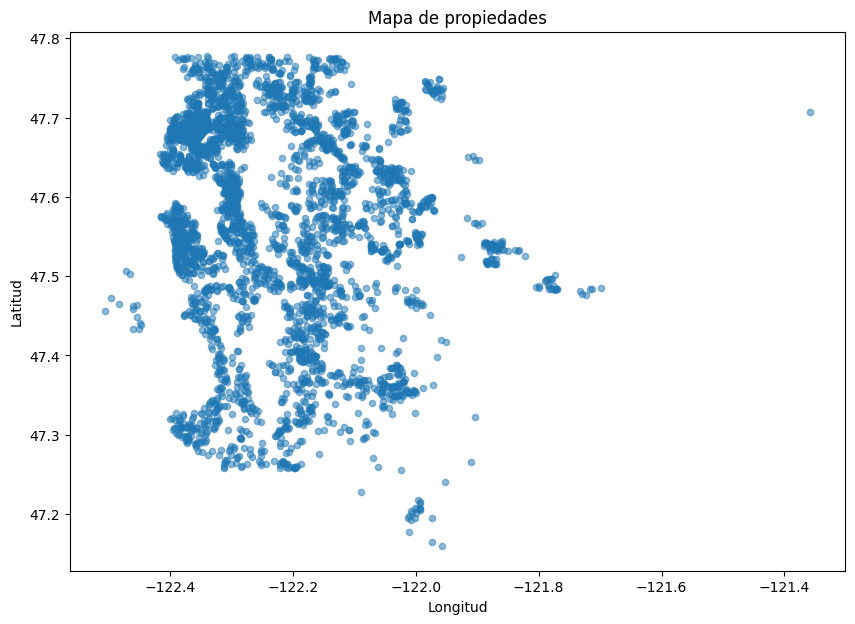

In [ ]:
# Se grafica la ubicación de las viviendas
housing_filtered.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    alpha=0.5,
    figsize=(10,7)
    )
plt.title(f"Mapa de propiedades")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

The coordinates correspond to properties in the city of Seattle and neighboring cities, in an area with several different lakes within the state of Washington.  

In the previous plot, all properties are represented by circles of the same radius and slight transparency, allowing us to identify areas with higher sample density. An additional variable will be added to this presentation, which will be the radius value of these circles. This radius will now be proportional to the lot size of each property.

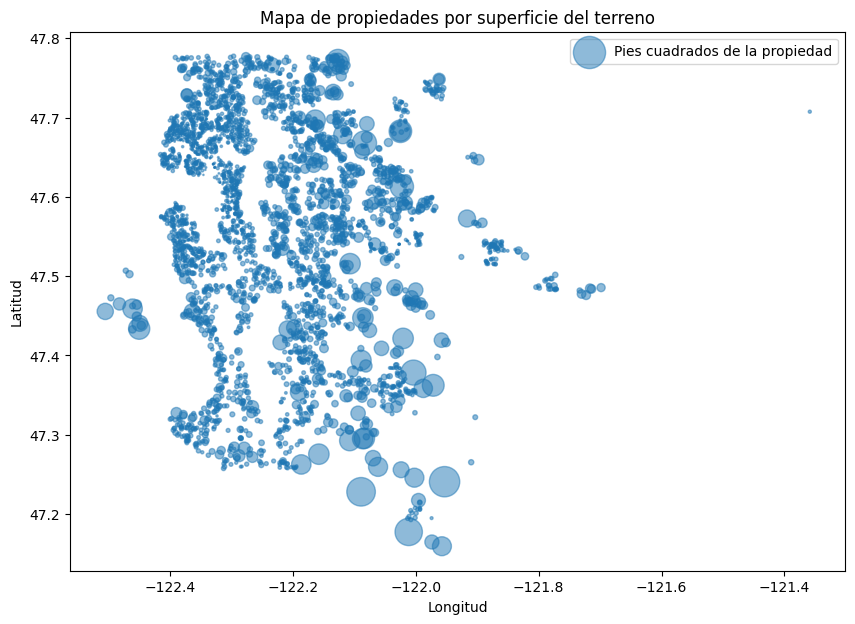

In [ ]:
# Mapa del area considerando superficie del terreno
housing_new.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    alpha=0.5,
    s=housing["sqft_lot"]/1000,
    label="Pies cuadrados de la propiedad",
    figsize=(10,7)
    )
plt.legend()
plt.title(f"Mapa de propiedades por superficie del terreno")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

The next step will be to add an additional factor, which is the price of the properties. It would be logical to assume that more densely populated areas have smaller lot sizes and higher prices. To verify this theory, the color of each circle will be changed using a scale called *jet*, which is a parameter of the **plot** method. Additionally, we will use the **TwoSlopeNorm** method from **matplotlib** to generate colors based on the maximum and minimum values present in the dataset.

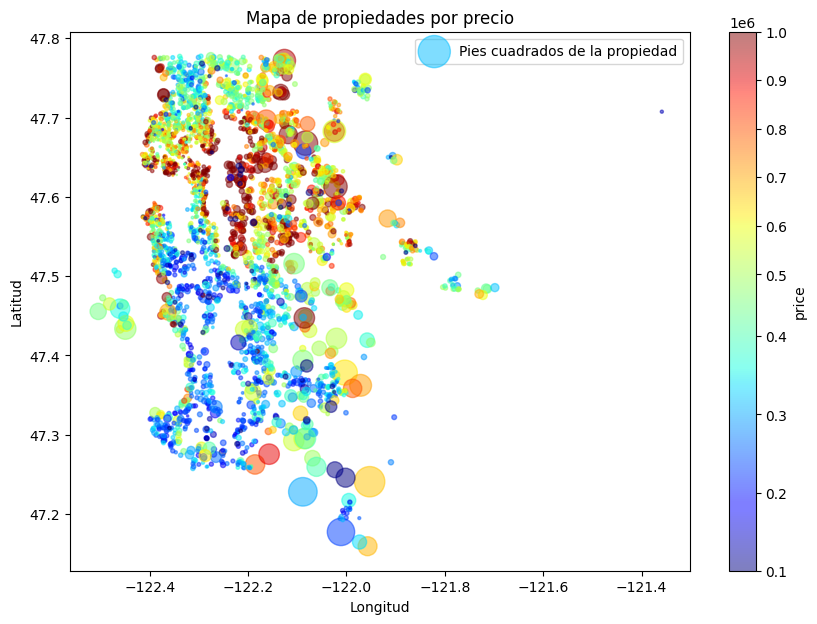

In [ ]:
from matplotlib.colors import TwoSlopeNorm

# Se calcula la mediana del precio en el dataset filtrado
median_price = housing_filtered["price"].median()

# Se crea la normalización centrada en la mediana
norm = TwoSlopeNorm(vmin=housing_filtered["price"].min(),
                    vcenter=median_price,
                    vmax=housing_filtered["price"].max())

# Mapa de las propiedades incluyendo precio
housing_new.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    alpha=0.5,
    s=housing["sqft_lot"]/1000,
    label="Pies cuadrados de la propiedad",
    figsize=(10,7),
    c="price",
    cmap=plt.get_cmap("jet"),
    colorbar=True,
    norm=norm,  # Se aplica la normalización
    )
plt.legend()
plt.title(f"Mapa de propiedades por precio")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

Now, the densities of properties, their lot sizes, and their prices are clearly visible. We can see that the [Seattle area](https://g.co/kgs/AoKuDtg) is indeed the most densely populated, with smaller properties and higher prices. As we move away from the central area, properties become cheaper, larger in size, and more spread out.

Having found a relationship between location, lot size, and price, we will attempt to find other relationships between variables in the dataset. To do this, we will use the **corr()** method to compute correlations between variables in the **housing_filtered** dataset.

After generating the correlation, we will plot the result, adding color to each value so that some of the most important correlations can be identified. To achieve this, we will implement the **heatmap()** method from the **seaborn** library.

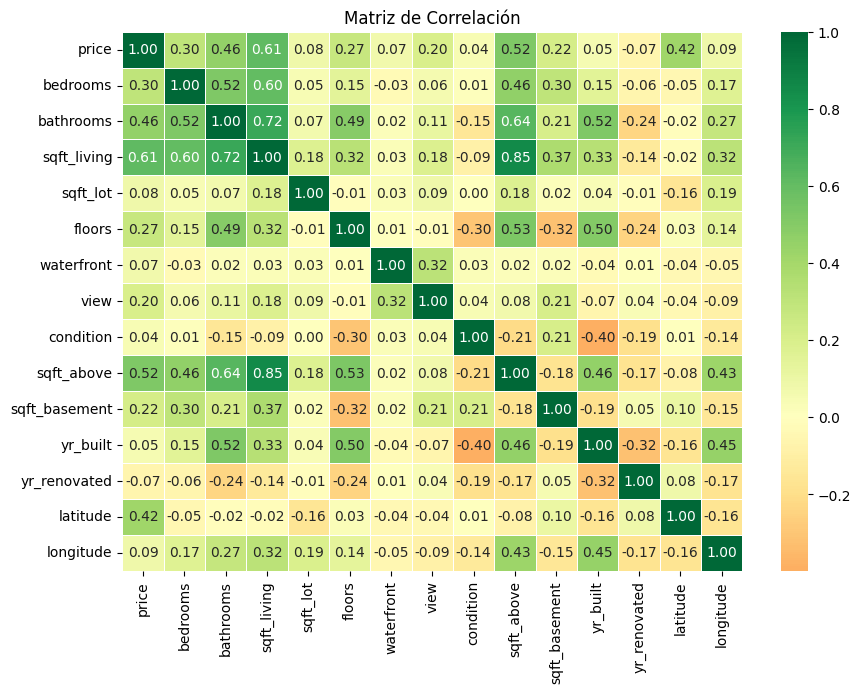

In [ ]:
import seaborn as sns

# Correlación entre variables
corr_matrix = housing_filtered.corr()

# Se crea un heatmap con una escala de colores "RdYlGn" (Rojo → Amarillo → Verde)
plt.figure(figsize=(10, 7))  # Ajustar tamaño de la figura
sns.heatmap(corr_matrix, annot=True, cmap="RdYlGn", center=0, linewidths=0.5, fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

Each correlation shows the degree of relationship or correspondence between two data series. For example, *price* has a correlation of 1 with itself and practically no relationship with the year the property was renovated (-0.07). An interesting observation is that, in general, there doesn't seem to be a significant relationship between price and lot size (0.08), although a more evident correlation exists with the living area (0.61). Another interesting correlation is between the property's age and its condition (-0.40). The older the property, the worse its condition.

There are many relationships to consider, but overall, it's valuable information that can be easily understood. The **corr()** method generates a square, symmetric matrix, where the elements of the main diagonal are always 1, and the other elements mirror the same values above and below that diagonal.

The next step will be to plot these correlations using the **scatter_matrix** method. Only attributes that show some degree of correlation with the housing price will be considered, and the rest will be discarded to avoid overcomplicating the graph.

It’s important to note that the elements of the main diagonal replace the correlation graph with one showing the distribution of the variable.

array([[<Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='bedrooms', ylabel='price'>,
        <Axes: xlabel='bathrooms', ylabel='price'>,
        <Axes: xlabel='sqft_living', ylabel='price'>,
        <Axes: xlabel='floors', ylabel='price'>,
        <Axes: xlabel='view', ylabel='price'>,
        <Axes: xlabel='sqft_above', ylabel='price'>,
        <Axes: xlabel='sqft_basement', ylabel='price'>],
       [<Axes: xlabel='price', ylabel='bedrooms'>,
        <Axes: xlabel='bedrooms', ylabel='bedrooms'>,
        <Axes: xlabel='bathrooms', ylabel='bedrooms'>,
        <Axes: xlabel='sqft_living', ylabel='bedrooms'>,
        <Axes: xlabel='floors', ylabel='bedrooms'>,
        <Axes: xlabel='view', ylabel='bedrooms'>,
        <Axes: xlabel='sqft_above', ylabel='bedrooms'>,
        <Axes: xlabel='sqft_basement', ylabel='bedrooms'>],
       [<Axes: xlabel='price', ylabel='bathrooms'>,
        <Axes: xlabel='bedrooms', ylabel='bathrooms'>,
        <Axes: xlabel='bathrooms', ylabel='bath

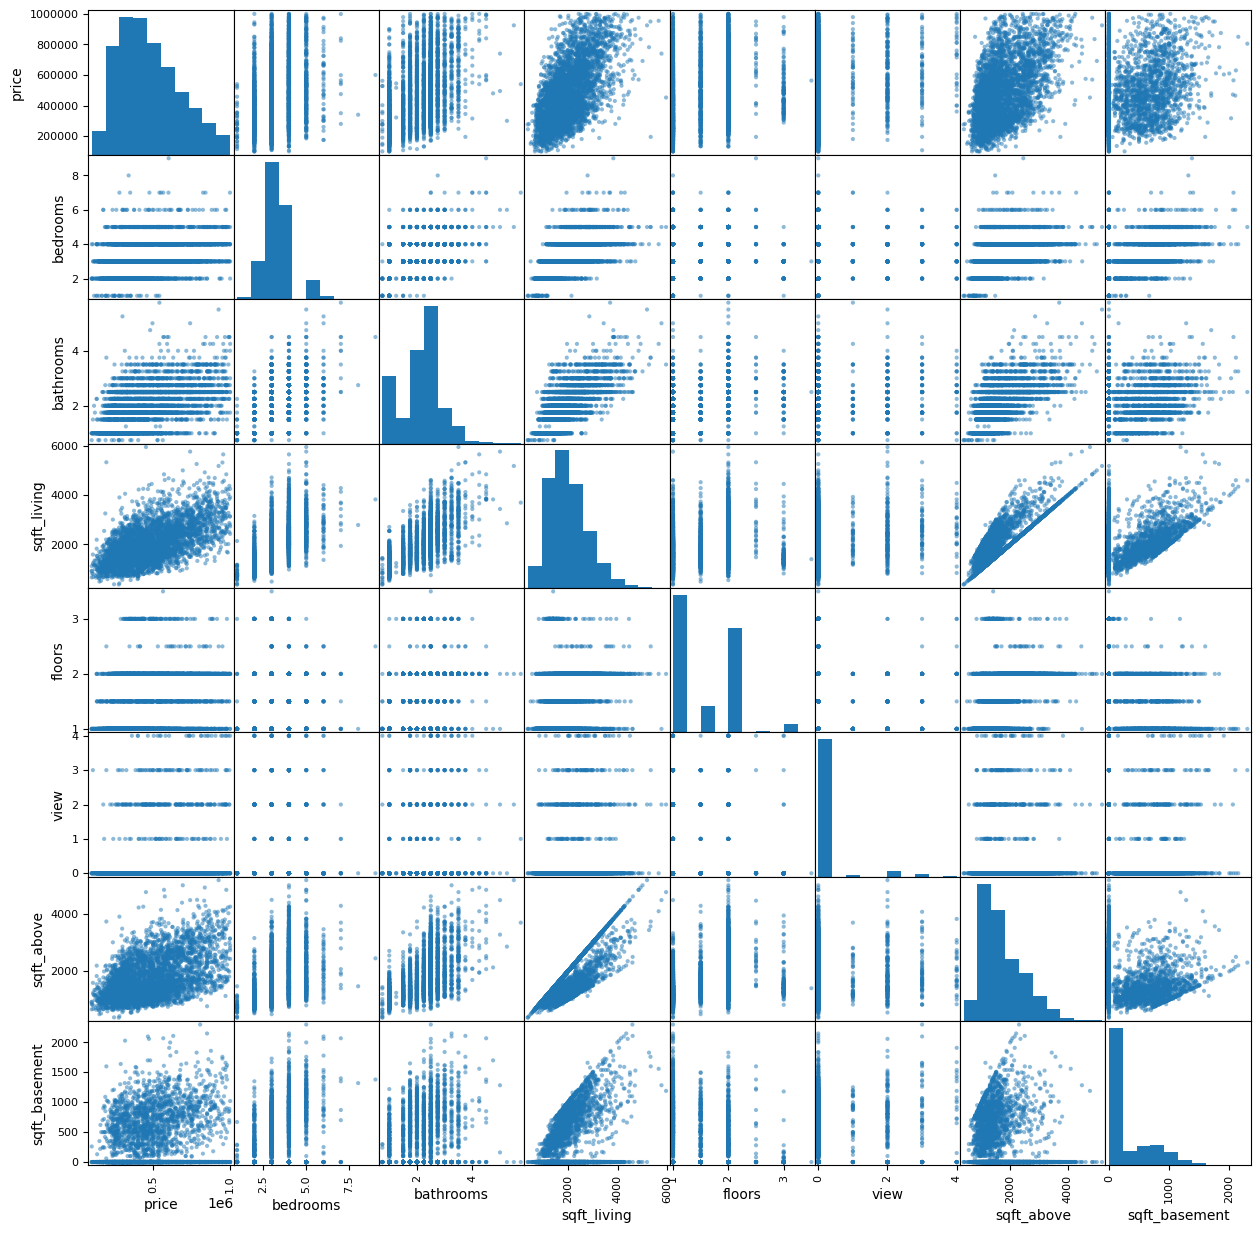

In [ ]:
from pandas.plotting import scatter_matrix

# Se seleccionan las variables que pueden infuenciar el precio
attributes = ["price", "bedrooms", "bathrooms", "sqft_living", "floors",
              "view", "sqft_above", "sqft_basement"]

# Se grafican las correlaciones entre todas las variables seleccionadas
scatter_matrix(housing_filtered[attributes], figsize=(15,15))

These graphs allow us to identify patterns of relationships between attributes. Next, we will plot some of the relationships provided by the graph, as well as others that may be interesting for further analysis.

<Axes: xlabel='sqft_living', ylabel='sqft_above'>

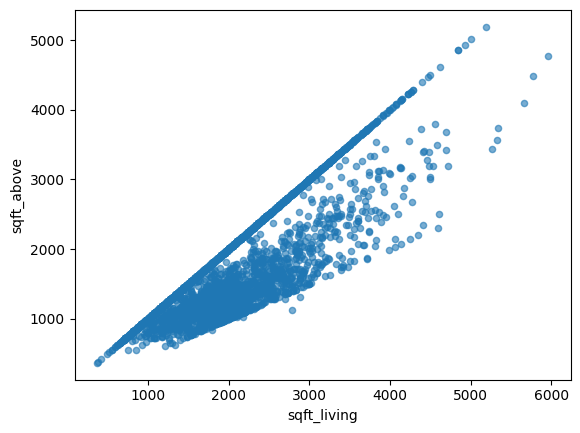

In [ ]:
# Gráfico sobre la relación entre los atributos sqft_living y sqft_above
housing_filtered.plot(kind="scatter", x="sqft_living",
                      y="sqft_above", alpha=0.6)

The first relationship is an obvious one, as we expect a linear relationship between the living area and the above-ground area (excluding the basement).

<Axes: xlabel='sqft_living', ylabel='price'>

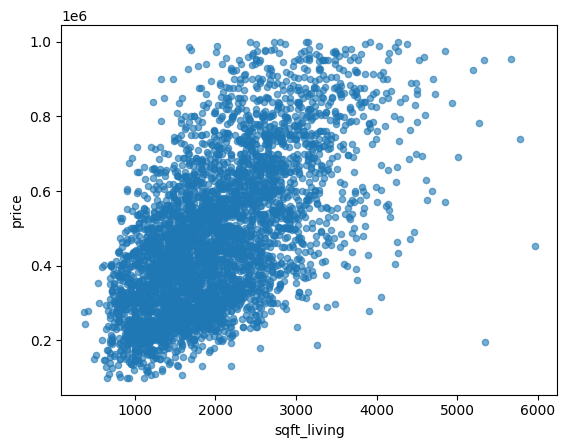

In [ ]:
# Gráfico sobre la relación entre los atributos sqft_living y price
housing_filtered.plot(kind="scatter", x="sqft_living", y="price", alpha=0.6)

The relationship between price and living area is another one that seems quite obvious, although there is noticeable data dispersion. This means that for the same surface area, there can be multiple possible housing prices. Other factors are contributing to this dispersion.

<Axes: xlabel='sqft_living', ylabel='bathrooms'>

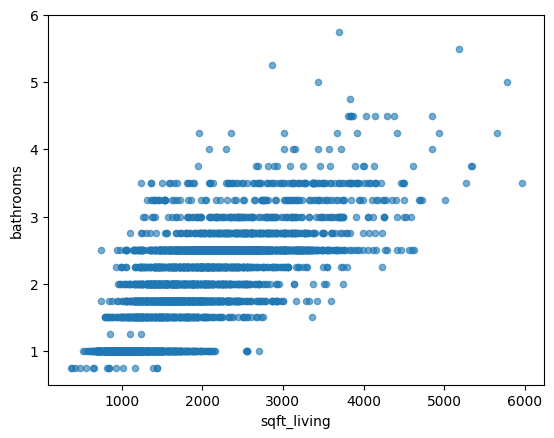

In [ ]:
# Gráfico sobre la relación entre los atributos sqft_living y bathrooms
housing_filtered.plot(kind="scatter", x="sqft_living", y="bathrooms", alpha=0.6)

In the case of the relationship between the number of bathrooms and living area, we find another quite obvious linear relationship. It is expected that with a larger living area, there will be more bathrooms. This graph also reveals another interesting fact: since the number of bathrooms takes specific values, horizontal lines are formed where properties of different living areas accumulate. The *bathrooms* attribute is intriguing because, although one might expect it to be discrete, in this dataset it takes integer values with fractional parts to distinguish bathrooms with different characteristics, such as "no shower." Therefore, while it is a *float64* attribute, its behavior is more typical of a discrete variable.

Now, let's take the case of the *bedrooms* attribute, which is indeed a discrete variable.

<Axes: xlabel='sqft_living', ylabel='bedrooms'>

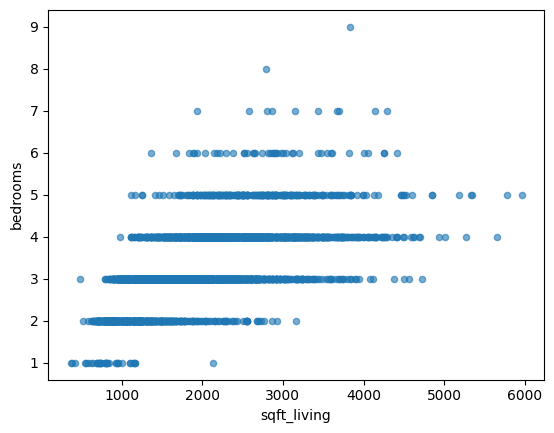

In [ ]:
# Gráfico sobre la relación entre los atributos sqft_living y bedrooms
housing_filtered.plot(kind="scatter", x="sqft_living", y="bedrooms", alpha=0.6)

The relationship is once again linear in appearance, but in this case, the characteristic of evaluating a discrete attribute against a continuous one becomes clearly noticeable.

<Axes: xlabel='yr_built', ylabel='sqft_lot'>

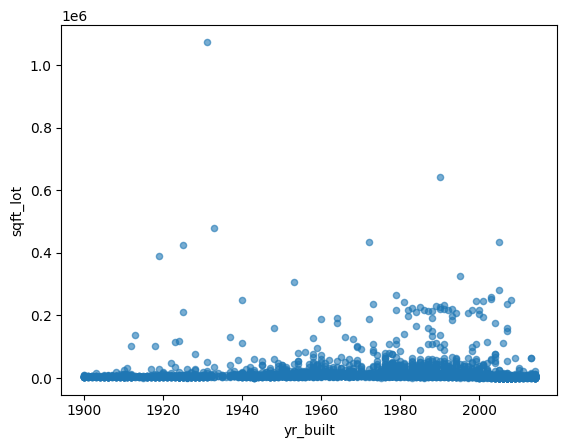

In [ ]:
# Gráfico sobre la relación entre los atributos yr_built y sqft_lot
housing_filtered.plot(kind="scatter", x="yr_built", y="sqft_lot", alpha=0.6)

In this correlation, a less obvious trend can be observed. Both variables show a low relationship, as the size of the property generally does not seem to depend on the year it was built, which is why there is a solid line at zero. However, it can be seen that as the years go by, there is a slight but growing trend for properties to have a larger surface area.

<Axes: xlabel='bathrooms', ylabel='price'>

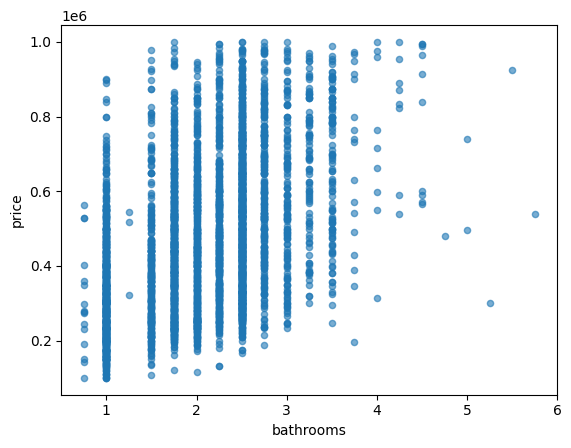

In [ ]:
# Gráfico sobre la relación entre los atributos bathrooms y price
housing_filtered.plot(kind="scatter", x="bathrooms", y="price", alpha=0.6)

<Axes: xlabel='bedrooms', ylabel='price'>

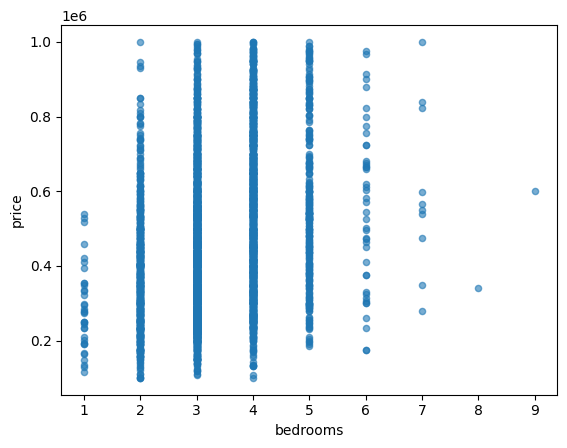

In [ ]:
# Gráfico sobre la relación entre los atributos bedrooms y price
housing_filtered.plot(kind="scatter", x="bedrooms", y="price", alpha=0.6)

Another interesting relationship arises when analyzing the price in relation to the number of bathrooms, suggesting that the number of bathrooms may be a factor when determining the price of a property. A similar relationship occurs between price and the number of bedrooms. In both cases, the relationship is increasing but shows a lot of dispersion.

Surprisingly, the same cannot be said regarding the year of construction.

<Axes: xlabel='yr_built', ylabel='price'>

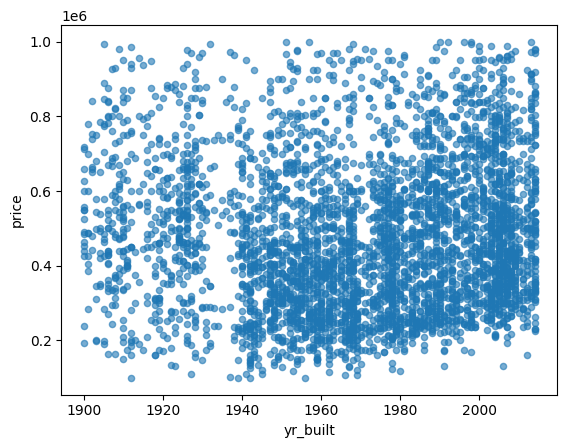

In [ ]:
# Gráfico sobre la relación entre los atributos yr_built y price
housing_filtered.plot(kind="scatter", x="yr_built", y="price", alpha=0.6)

Even using the dataset where properties with a price of zero have been filtered out, and both very low and very high prices have been removed, the relationship between the year of construction and price seems to be non-existent. In other words, the year the property was built does not appear to influence the housing price.

## **Data Processing**

Before training a model to predict the prices of homes in the dataset, it is necessary to split the data into two subsets: **train_set** and **test_set**.

The training set (**train_set**) will be used to create the model, while the test set (**test_set**) will serve to evaluate the performance of the trained model.

It is important to remember that the training dataset can cause the model to have a bias, causing it to perform better at predicting certain prices and not others. For example, if the dataset is split such that the most expensive homes are in the test set, while the lower-priced homes are in the training set, the model is likely to perform very well at predicting the prices of the lower-priced homes and fail when predicting the higher-priced ones. This happens because the data used to train the model has an intrinsic bias.

To avoid this issue, an analysis should be performed to determine if there are categories within the dataset, and when creating the **train_set** and **test_set**, both should have the same categories in the same proportions to prevent bias in the model.

While the example uses the price of the homes, this analysis should actually be carried out with the entries that will be used to train the model. From the data analysis in the previous section, it was found that one of the most important correlations is between the price and the living area of the property (*sqft_living*). Based on this, categories will be created using the **cut()** method provided by the **pandas** library.

<Axes: >

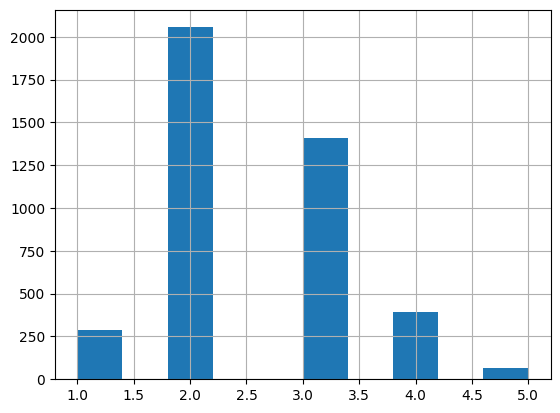

In [ ]:
# Se importa la librería numpy
import numpy as np

# Se crean categorías en base a las superficie habitable de la vivienda
# Estas categorías son agregadas al dataset
housing_filtered["sqft_living_cat"] = pd.cut(housing_filtered["sqft_living"],
                                            bins=[0,1000,2000,3000,4000,np.inf],
                                            labels=[1,2,3,4,5])

# Se grafica con un histograma el nuevo atributo
housing_filtered["sqft_living_cat"].hist()

When separating the homes into categories based on their living area, it is observed that their distribution is not uniform.

With this information, the **train_set** and **test_set** will be generated in such a way that they maintain the same proportions as the original dataset. To achieve this, the **StratifiedShuffleSplit** method from the **sklearn** library will be used.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

# Se crea un objeto split para llevar a cabo la separación entre train_set y
# test_set estratificando los datos. Se considera un tamaño de test_set del 20%
# del dataset housing_filtered
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Se lleva a cabo el split del dataset
for train_index, test_index in split.split(housing_filtered,
                                           housing_filtered["sqft_living_cat"]):
    strat_train_set = housing_filtered.iloc[train_index]
    strat_test_set = housing_filtered.iloc[test_index]

# Se crea una tabla con proporciones
comparison_df = pd.DataFrame({
    "Dataset Completo":
    housing_filtered["sqft_living_cat"].value_counts()/len(housing_filtered),
    "Train Set":
    strat_train_set["sqft_living_cat"].value_counts()/len(strat_train_set),
    "Test Set":
    strat_test_set["sqft_living_cat"].value_counts()/len(strat_test_set),
}).round(3)  # Se redondean los valores a 3 decimales

# Se agrega la diferencia entre test_set y dataset completo (error de muestreo)
comparison_df["% Error Test"] = (comparison_df["Test Set"] /
                                 comparison_df["Dataset Completo"] - 1) * 100

# Se muestra la tabla
display(comparison_df)

,Dataset Completo,Train Set,Test Set,% Error Test
sqft_living_cat,,,,
2,0.489,0.489,0.489,0.0
3,0.335,0.335,0.335,0.0
4,0.093,0.093,0.093,0.0
1,0.068,0.068,0.068,0.0
5,0.015,0.015,0.015,0.0


This way, the filtered dataset is split into a **strat_test_set** and a **strat_train_set**, each of which has been stratified to have records in the same proportions as the original dataset. Additionally, the records were selected randomly when performing the split.

To verify that the data has been correctly stratified in both datasets, a table is created to compare the values of both against the full dataset, and the error in the **strat_test_set** is calculated relative to the original dataset.

The next step will be to standardize the data in the **strat_train_set** using the **StandardScaler** method from the **sklearn** library. This method calculates the mean, subtracts it from each value, and then divides by the standard deviation. Therefore, the data will have a mean of zero and unit variance. Additionally, any invalid data will need to be imputed, which will be done using the **SimpleImputer** method, also from **sklearn**. Finally, both methods will be concatenated into a **pipeline** using the **Pipeline** method from the same library. This **pipeline** will be implemented through a function called **prep_dataset()**.

However, before implementing the **pipeline**, attributes with low correlation to the housing prices will be removed.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Se elimina el atributo creado para estratificar los datasets
strat_train_set = strat_train_set.drop("sqft_living_cat", axis=1)
strat_test_set = strat_test_set.drop("sqft_living_cat", axis=1)

# Se eliminan los atributos con correlación baja
strat_train_set = strat_train_set.drop(["sqft_lot", "waterfront",
                                        "condition", "yr_built",
                                        "yr_renovated"], axis=1)
strat_test_set = strat_test_set.drop(["sqft_lot", "waterfront",
                                        "condition", "yr_built",
                                        "yr_renovated"], axis=1)

In [ ]:
# Se genera una función que separa el atributo objetivo a ser estimado, de los
# demás. Luego el dataset resultante es procesado por un pipeline para
# entrenar algún modelo predictivo.
def prep_dataset(dataset, objective_attribute, imputer_strategy):
  # Se separá el valor a predecir del resto de los datos
  dataset_labels = dataset[objective_attribute]
  dataset = dataset.drop(objective_attribute, axis=1)
  # Se crea un pipeline de procesamiento
  num_pipeline = Pipeline([
      ('imputer', SimpleImputer(strategy=imputer_strategy)),
      ('std_scaler', StandardScaler())
  ])
  dataset = num_pipeline.fit_transform(dataset)
  return dataset, dataset_labels

# Se aplica el pipeline al train_set
train_set, train_set_labels = prep_dataset(strat_train_set, "price", "median")

Now that the **train_set** has been stratified and scaled, a model can be selected for training.

## **Model Training and Evaluation**

Since the goal is to generate a model that can predict housing prices in Seattle and surrounding areas, predictive models will be implemented, such as a linear regressor. To achieve this, a function called **price_model()** will be created, which takes a selected model, the training set (**train_set**), and the expected output of that training set (**train_set_labels**). It will process this data to train the model, generate predictions, and measure its accuracy by calculating the root mean squared error (RMSE). The RMSE will be calculated using the **mean_squared_error** method from the **sklearn** library.

The first model to evaluate will be a linear regressor, using the **LinearRegression** method from the **sklearn** library.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Se crea un objeto del tipo LinearRegression
lin_reg = LinearRegression()

# Se define una función que entrena el modelo con el dataset de entrenamiento
# y sus valores esperados (standard_train_set y train_set_labels), calcula el
# la raiz del error cuadrático medio (RMSE) y se imprime dicho valor. La función
# devuelve el modelo calculado.
def price_model(model, train_dataset, labels):
    # Se guarda el nombre del modelo
    model_name = type(model).__name__
    # Se entrena el modelo
    model.fit(train_dataset, labels)
    # Se genera una predicción usando el mismo dataset
    predictions = model.predict(train_dataset)
    # Se calcula el error cuadrático medio
    mse = mean_squared_error(labels, predictions)
    rmse = np.sqrt(mse)
    # Se imprime la raíz dle error cuadrático medio
    print(f"Raíz del error cuadrático medio del modelo {model_name}: {rmse}")
    # Se devuelve el modelo y las predicciones
    return model, predictions

# Se general el modelo LinearRegression y se imprime la raiz del
# error cuadrático medio
lin_reg, lin_reg_predictions = price_model(lin_reg, train_set, train_set_labels)

Raíz del error cuadrático medio del modelo LinearRegression: 129506.56502134392


The mean squared error is quite high, especially considering that the minimum price of a house in the dataset is USD 100,000.

Recalling the graph where the price of the house is related to the living area, a comparison will be plotted between the actual prices and the predicted prices to better understand the dispersion of the predictions. This graph will also be implemented by creating a function called **print_price_prediction()**.

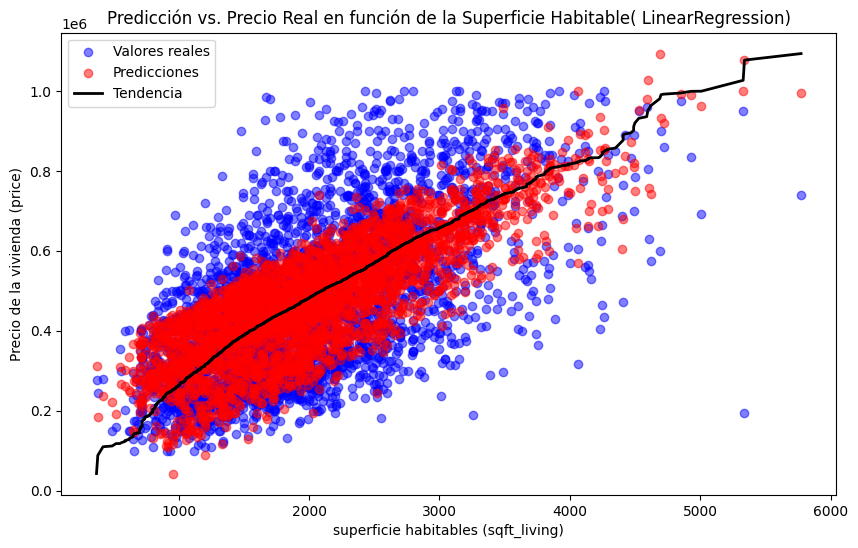

In [ ]:
# Se define una función que toma uno de los atributos de un dataset (X), el
# valor real que debe ser predecido (y) y el valor predicho por un modelo
# (y_pred); y se grafican ambos sets junto una curva de tendencia.
def print_price_prediction(X, y, y_pred, model):
  # Se guarda el nombre del modelo
  model_name = type(model).__name__
  # Se genera un gráfico de las variables a comparar
  plt.figure(figsize=(10, 6))
  plt.scatter(X, y, alpha=0.5, label="Valores reales", color="blue")
  plt.scatter(X, y_pred, alpha=0.5, label="Predicciones", color="red")
  plt.plot(np.sort(X.values, axis=0), np.sort(y_pred), color="black",
           linewidth=2, label="Tendencia")
  plt.xlabel("superficie habitables (sqft_living)")
  plt.ylabel("Precio de la vivienda (price)")
  title = "Predicción vs. Precio Real en función de la Superficie Habitable"
  plt.title(title+f"( {model_name})")
  plt.legend()
  plt.show()

# Se grafican los valores reales vs las predicciones
print_price_prediction(strat_train_set["sqft_living"], train_set_labels,
                       lin_reg_predictions, lin_reg)

It can be observed that although the RMSE is high, the model's trend tends to follow the actual values of the houses.

Having created a linear regression model, the next step is to evaluate a **DecisionTreeRegressor** from the same library, using the functions previously declared (**price_model()** and **print_price_prediction()**).

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Se crea un objeto DecisionTreeRegressor()
tree_reg = DecisionTreeRegressor()

# Se general el modelo DecisionTreeRegressor y se imprime la raiz del
# error cuadrático medio
tree_reg, tree_reg_predictions = price_model(tree_reg, train_set,
                                             train_set_labels)

Raíz del error cuadrático medio del modelo DecisionTreeRegressor: 4753.456901416501


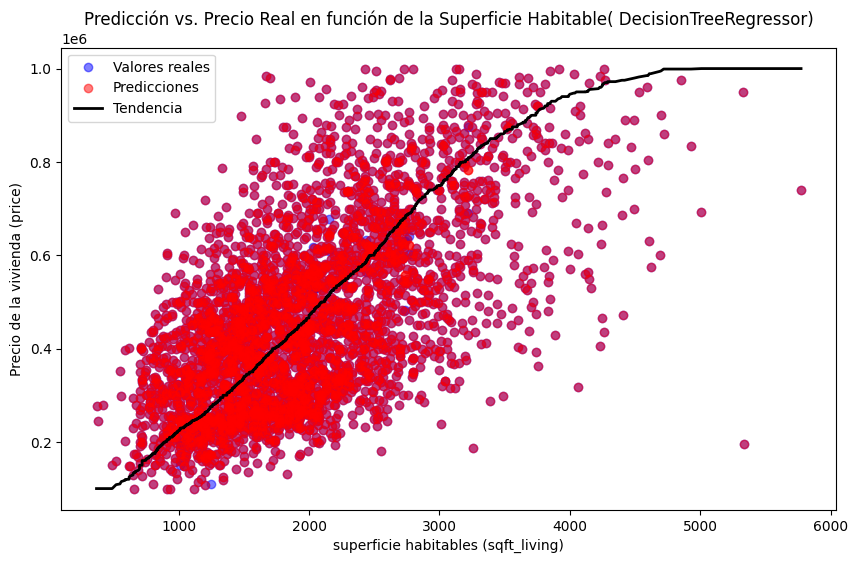

In [ ]:
# Se grafican los valores reales vs las predicciones
print_price_prediction(strat_train_set["sqft_living"], train_set_labels,
                       tree_reg_predictions, tree_reg)

The model seems to have a very small error and successfully predict all the prices in the **train_set**. Since the error is so low, it could be a case of "overfitting," which means the model is too closely fit to the training set. This means that while the model predicts prices very accurately in the **train_set**, it doesn't generalize well to new data, such as from the **test_set**, and might fail to predict prices for homes it hasn't seen before.

The fact that the model has such a low error on the training set is a sign that it may be "memorizing" the data rather than learning generalizable patterns.

As mentioned, the root mean squared error (RMSE) isn't the best metric to evaluate the model's ability to generalize. It's possible that this metric doesn't reflect the model's behavior with data that isn't part of the training set.

To get a better understanding of the model's performance, the next step would be to try another type of model, such as the **RandomForestRegressor**, which may be more robust and less prone to overfitting than the **DecisionTreeRegressor**. Unlike a single decision tree, a random forest creates multiple decision trees, which tends to improve the model's generalization by averaging the results of all trees and reducing variance.

Now, the next step will be to implement and evaluate the **RandomForestRegressor** model from **sklearn**.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Se crea un objeto RandomForestRegressor()
forest_reg = RandomForestRegressor()

# Se general el modelo RandomForestRegressor y se imprime la raiz del
# error cuadrático medio
forest_reg, forest_reg_predictions = price_model(forest_reg, train_set,
                                                 train_set_labels)

Raíz del error cuadrático medio del modelo RandomForestRegressor: 37462.695397744545


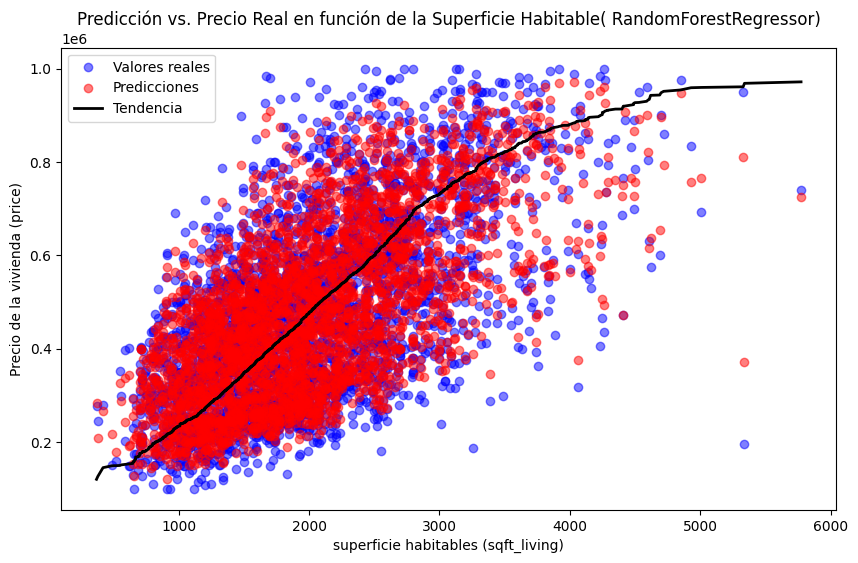

In [ ]:
# Se grafican los valores reales vs las predicciones
print_price_prediction(strat_train_set["sqft_living"], train_set_labels,
                       forest_reg_predictions, forest_reg)

The mean squared error obtained by applying a **RandomForestRegressor** model is considerably lower than that of the **LinearRegressor**, but higher than the one obtained with the **DecisionTreeRegressor** model. After obtaining three models, the next step is to evaluate all three using a cross-validation method provided by the **sklearn** library, known as "K-fold cross-validation," which corresponds to the **cross_val_score** method.

This method takes the **train_set**, randomly splits it into a certain number of "K-folds" (for example, 10), then trains and evaluates the model as many times as there are "K-folds." In this process, one "K-fold" is used as the test set, and the remaining 9 "K-folds" are used to train the model. This process is repeated 10 times, one for each "K-fold." The result will be 10 evaluation scores for each process.

Since this process will be carried out for each model, a function called **price_model_scores()** will be created to reuse the same process for all models.

In [ ]:
from sklearn.model_selection import cross_val_score

# Se genera una función que toma un modelo, un set de entrenamiento y
# la variable a predecir; y se implementa una validación cruzada para determinar
# la precisión del modelo.
def price_model_scores(model, train_dataset, labels, kfolds):
    # Se guarda el nombre del modelo
    model_name = type(model).__name__
    # Se generan los puntajes del modelo
    scores = cross_val_score(model, train_dataset, labels,
                             scoring="neg_mean_squared_error", cv=kfolds)
    # Se calcula la raíz cuadrada del error cuadrático medio
    rmse_scores = np.sqrt(-scores)
    # Se imprimen los valores de puntaje
    print(f"Modelo: {model_name}")
    print(f"Puntajes: {rmse_scores}")
    print(f"Media: {rmse_scores.mean()}")
    print(f"Desviación estándar: {rmse_scores.std()}")
    # Se devuelven los puntajes
    return rmse_scores

# Se evalua el modelo LinearRegression
lin_reg_scores = price_model_scores(lin_reg, train_set,
                                    train_set_labels, 10)
print("\n")

# Se evalua el modelo DecisionTreeRegression
tree_reg_scores = price_model_scores(tree_reg, train_set,
                                     train_set_labels, 10)
print("\n")

# Se evalua el modelo LinearRegression
forest_reg_scores = price_model_scores(forest_reg, train_set,
                                       train_set_labels, 10)

Modelo: LinearRegression
Puntajes: [134493.02871896 129266.10905507 131695.01651005 126160.30800949
 133109.0920585  119654.93100399 127976.83355339 132311.87387053
 134098.15201811 130189.76218265]
Media: 129895.51069807445
Desviación estándar: 4256.627388808345


Modelo: DecisionTreeRegressor
Puntajes: [136139.82538954 132934.05967647 141526.37304925 129356.86953451
 125282.182071   136045.48689408 127997.81732053 133551.13174961
 134606.90600342 124696.51667426]
Media: 132213.71683626802
Desviación estándar: 5053.188502786418


Modelo: RandomForestRegressor
Puntajes: [114726.72522497  99837.45781151  99381.81740758 105793.60699426
  99677.09145367  94118.18585898  98355.73039476  93646.58771636
 103114.00899299  93937.87475244]
Media: 100258.90866075242
Desviación estándar: 6118.794348686181


As can be seen, the **DecisionTreeRegressor** model initially created was indeed overfitted to the **train_set**. When evaluated using the **price_model_scores()** function, we found that the root mean squared error of this model is the highest of the three, making it the least accurate, closely followed by the **LinearRegressor** model. The most accurate in relative terms is the **RandomForestRegressor** model, by at least USD 30,000, although it is not very precise in absolute terms.

## **Model Validation**

After evaluating the different models, they will be validated using the **test_set**. For this, we will apply the functions already used to process the dataset and analyze their predictions.

The first step will be to create a function that allows us to generate predictions based on the test dataset, reusing the code from the **price_model()** function. This new function will be called **model_prediction()**.

In [ ]:
# Se aplica el pipeline al test_set
test_set, test_set_labels = prep_dataset(strat_test_set, "price", "median")

# Se define una función para generar predicciones utilizando un modelo ya
# entranado, y se calcula el RMSE
def model_prediction(model, test_dataset, labels):
    # Se guarda el nombre del modelo
    model_name = type(model).__name__
    # Se generan predicciones en base al dataset
    predictions = model.predict(test_dataset)
    # Se calcula el RMSE
    mse = mean_squared_error(labels, predictions)
    rmse = np.sqrt(mse)
    # Se imprime el RMSE
    print(f"Raíz del error cuadrático medio del modelo {model_name}: {rmse}")
    # Se devuelven las predicciones
    return predictions

# Se generan predicciones del model LinearRegressor
lin_reg_test_predictions = model_prediction(lin_reg, test_set,
                                            test_set_labels)
print("\n")

# Se generan predicciones del model DecisionTreeRegressor
tree_reg_test_predictions = model_prediction(tree_reg, test_set,
                                             test_set_labels)
print("\n")

# Se generan predicciones del model RandomForestRegressor
forest_reg_test_predictions = model_prediction(forest_reg, test_set,
                                             test_set_labels)

Raíz del error cuadrático medio del modelo LinearRegression: 141542.43702673184


Raíz del error cuadrático medio del modelo DecisionTreeRegressor: 152845.23732977852


Raíz del error cuadrático medio del modelo RandomForestRegressor: 130183.20427704048


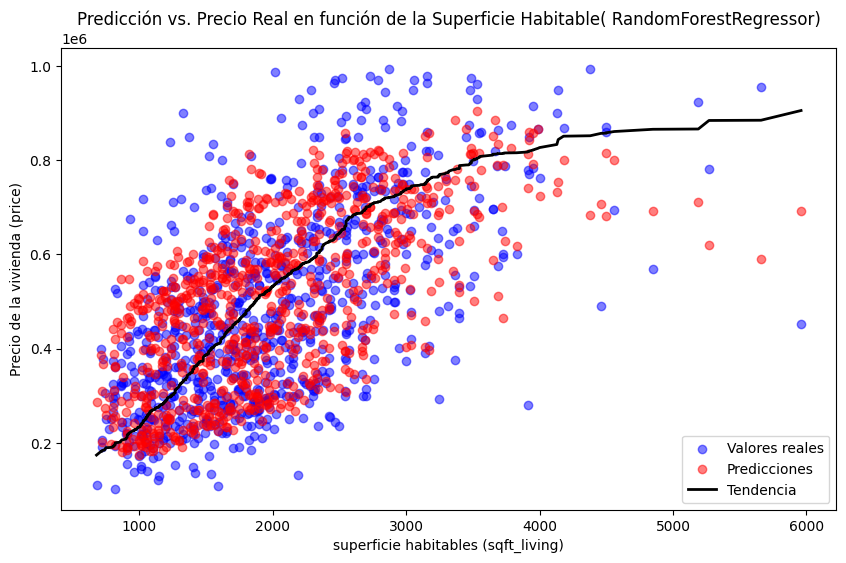

In [ ]:
# Se grafican los valores reales vs las predicciones
print_price_prediction(strat_test_set["sqft_living"], test_set_labels,
                       forest_reg_test_predictions, forest_reg)

**Conclusions**

An analysis was carried out on the dataset records and their attributes. Data that could cause the training process to fail was filtered out, the correlations between the attributes of the remaining records were analyzed, and those with the strongest correlation to the target variable, price, were kept.

Next, the data was split into two subsets (train set and test set), with stratification based on the attribute most correlated with house prices. Missing values were completed, and the attributes of both subsets were standardized.

With the processed dataset, three models were trained, and their outputs were evaluated using RMSE and cross-validation. It was detected that one model had overfitted to the training set, and the most accurate model was identified (**RandomForestRegressor**), though none of the models had a high absolute accuracy.

Finally, the three models were validated using the test set, and the results were verified with consistent findings.